In [1]:
from typing import Any, Callable, Dict, Optional, Tuple
from torchvision.datasets.utils import download_and_extract_archive
from torchvision.datasets import VisionDataset
from pathlib import Path
from PIL import Image

class Imagenette(VisionDataset):
    """
    Imagenette is a subset of 10 easily classified classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute).

    Released by fast.ai and available at https://github.com/fastai/imagenette
    """

    url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz"
    tgz_md5 = "fe2fc210e6bb7c5664d602c3cd71e612"
    filename = "imagenette2.tgz"

    lbl_dict = dict(
        n01440764="tench",
        n02102040="English springer",
        n02979186="cassette player",
        n03000684="chain saw",
        n03028079="church",
        n03394916="French horn",
        n03417042="garbage truck",
        n03425413="gas pump",
        n03445777="golf ball",
        n03888257="parachute",
    )

    def label_func(fname):
        return Imagenette.lbl_dict[Path(fname).parent.name]

    def __init__(
        self,
        root: str,
        train: bool = True,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        download: bool = False,
    ) -> None:
        super().__init__(root, transform=transform, target_transform=target_transform)
        self.train = train

        if download:
            self.download()

        self.data, self.targets = self._load(train=self.train)

        # self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        # self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC

        self._load_meta()

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index]

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.open(img)

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self) -> int:
        return len(self.data)

    def _load(self, train: bool = True) -> Dict[str, str]:
        train = "train" if train else "val"
        data, targets = [], []

        for target, label_id in enumerate(self.lbl_dict.keys()):
            label_folder = (
                Path(self.root) / self.filename.split(".")[0] / train / label_id
            )

            for fname in label_folder.glob("*.JPEG"):
                data.append(fname)
                targets.append(target)

        return data, targets

    def _load_meta(self) -> None:
        self.classes = list(self.lbl_dict.values())
        self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}

    def _check_integrity(self) -> bool:
        for label_id in self.lbl_dict.keys():
            label_folder = (
                Path(self.root) / self.filename.split(".")[0] / "train" / label_id
            )
            if not label_folder.exists():
                return False

        return True

    def download(self) -> None:
        if self._check_integrity():
            print("Files already downloaded and verified")
            return
        download_and_extract_archive(
            self.url, self.root, filename=self.filename, md5=self.tgz_md5
        )

    def extra_repr(self) -> str:
        split = "Train" if self.train is True else "Test"
        return f"Split: {split}"

In [2]:
dset = Imagenette(root="./data/imagenette", train="train", download=True)
dset

Files already downloaded and verified


Dataset Imagenette
    Number of datapoints: 9469
    Root location: ./data/imagenette
    Split: Test

tench


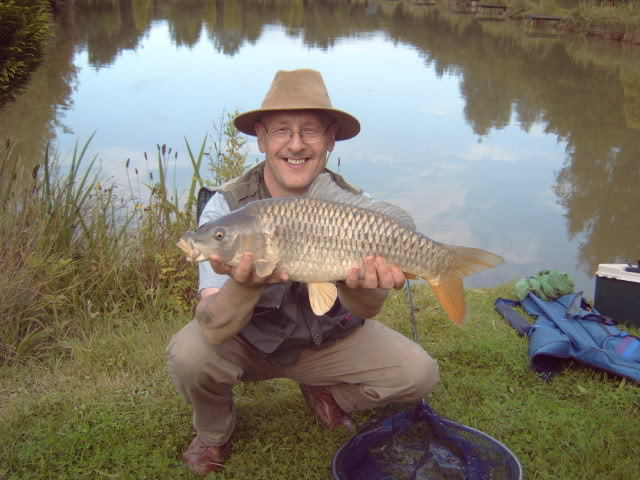

In [3]:
print(dset.classes[dset[0][1]])

dset[0][0]

In [5]:
from generalization.randomization import RandomizedDataset

RandomizedDataset(
    dataset=dset, 
    corruption_name="partial_labels",
    corruption_prob=0.5,
    # apply_corruption=False,
    return_corruption=True,
)[0]

(tensor([[[0.2627, 0.2157, 0.1608,  ..., 0.3608, 0.3843, 0.3294],
          [0.2157, 0.1686, 0.1255,  ..., 0.3686, 0.3882, 0.3412],
          [0.2863, 0.2471, 0.2235,  ..., 0.3882, 0.4078, 0.3647],
          ...,
          [0.3804, 0.3608, 0.3412,  ..., 0.2706, 0.3412, 0.3333],
          [0.3333, 0.3098, 0.2863,  ..., 0.2980, 0.3647, 0.3647],
          [0.3333, 0.2980, 0.2824,  ..., 0.3373, 0.4000, 0.4039]],
 
         [[0.1961, 0.1451, 0.0902,  ..., 0.3216, 0.3490, 0.2941],
          [0.1529, 0.1020, 0.0588,  ..., 0.3294, 0.3490, 0.3059],
          [0.2275, 0.1882, 0.1608,  ..., 0.3490, 0.3686, 0.3255],
          ...,
          [0.3529, 0.3333, 0.3137,  ..., 0.2627, 0.3333, 0.3255],
          [0.3059, 0.2824, 0.2588,  ..., 0.2902, 0.3569, 0.3569],
          [0.3059, 0.2706, 0.2549,  ..., 0.3294, 0.3922, 0.3961]],
 
         [[0.1333, 0.0902, 0.0431,  ..., 0.1804, 0.1961, 0.1412],
          [0.0627, 0.0235, 0.0000,  ..., 0.1882, 0.2078, 0.1529],
          [0.1059, 0.0745, 0.0588,  ...,